# LILA-PINN: sensitivity analysis of CPD hyperparameters

In [1]:
import sys
sys.path.append('..')
from _utils import *
from _utils.methods import *
u_path = '../_utils/'

In [2]:
df_cusum_ua1 = pd.read_pickle(u_path+'df_SA_l1_s3.pkl')
df_cusum_ua1['TTD_mean'] = [e.total_seconds()/3600 for e in df_cusum_ua1['TTD_mean']]
df_cusum_ua1['recall'] = df_cusum_ua1['TP']/(df_cusum_ua1['TP']+df_cusum_ua1['FN'])
df_cusum_ua1['precision'] = df_cusum_ua1['TP']/(df_cusum_ua1['TP']+df_cusum_ua1['FP'])
df_cusum_ua1['f1'] = 2*df_cusum_ua1['TP']/(2*df_cusum_ua1['TP']+df_cusum_ua1['FP']+df_cusum_ua1['FN'])
df_cusum_ua1 = df_cusum_ua1.dropna()

In [3]:
df_cusum_ua2 = pd.read_pickle(u_path+'df_SA_l2_s3.pkl')
df_cusum_ua2['TTD_mean'] = [e.total_seconds()/3600/24 for e in df_cusum_ua2['TTD_mean']]
df_cusum_ua2['recall'] = df_cusum_ua2['TP']/(df_cusum_ua2['TP']+df_cusum_ua2['FN'])
df_cusum_ua2['precision'] = df_cusum_ua2['TP']/(df_cusum_ua2['TP']+df_cusum_ua2['FP'])
df_cusum_ua2['f1'] = 2*df_cusum_ua2['TP']/(2*df_cusum_ua2['TP']+df_cusum_ua2['FP']+df_cusum_ua2['FN'])
df_cusum_ua2 = df_cusum_ua2.dropna()

## Figure 7

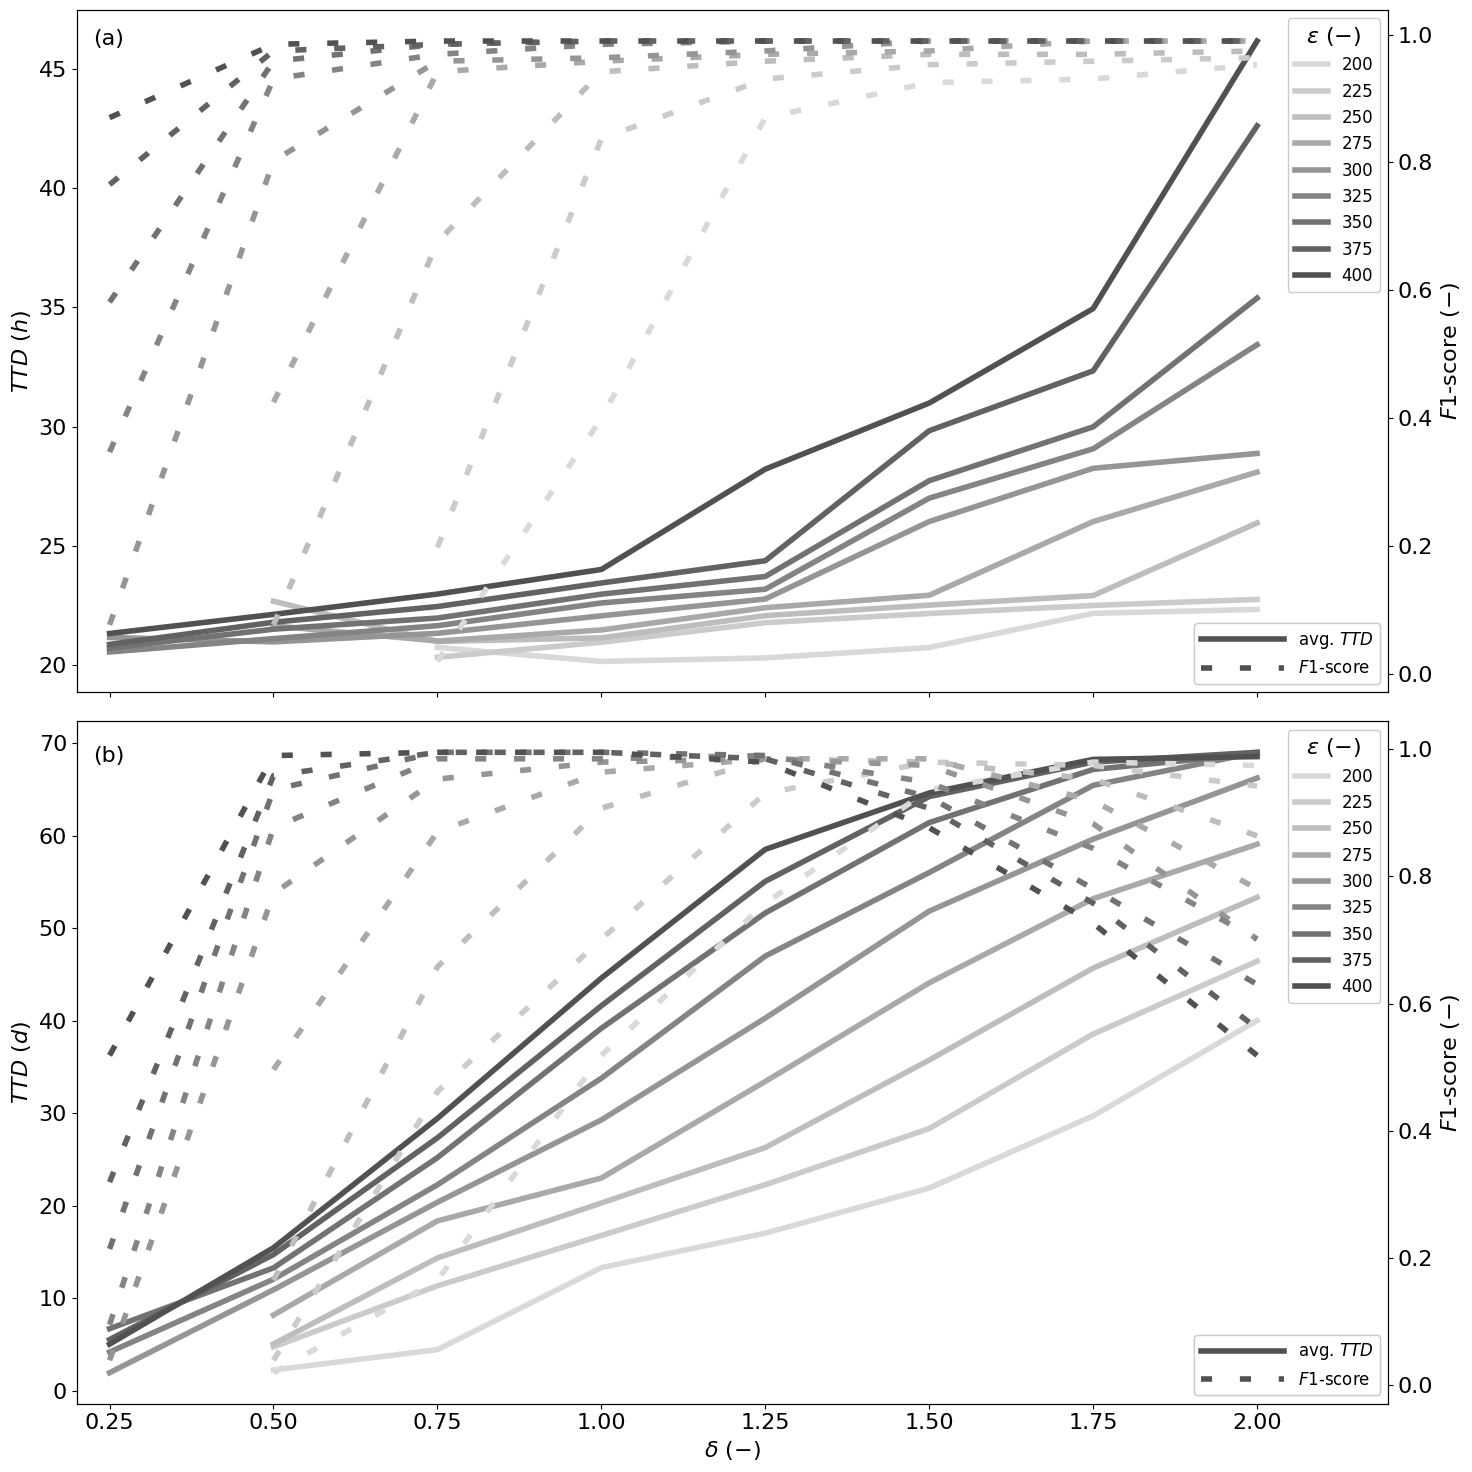

In [4]:
name,metric = ('$F1$-score','f1')

f,axs = plt.subplots(2,figsize=(15,15),sharex=1)
for i,(ax,df_cusum_ua) in enumerate(zip(axs,[df_cusum_ua1,df_cusum_ua2])):
    ax2 = ax.twinx()
    for eps in np.sort(df_cusum_ua['epa'].unique()):
        df_plot = df_cusum_ua[df_cusum_ua['epa']==eps]
        ax.plot(df_plot['delta'],df_plot['TTD_mean'],
                lw=4,label=eps,
                c=mpl.colormaps.get_cmap('Greys')((eps-100)/400))
        ax2.plot(df_plot['delta'],df_plot[metric],ls=(0, (2, 5)),
                 lw=4,label=eps,
                 c=mpl.colormaps.get_cmap('Greys')((eps-100)/400))

    ax.set_xlim(0.2,2.2)
    e = ['h','d']
    ax.set_ylabel('$TTD$ (${}$)'.format(e[i]))
    #ax2.set_ylim(0.48,1.02)
    ax2.set_ylabel('{} ($-$)'.format(name))
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    first_legend = plt.legend(handles1, labels1, loc=1, prop={'size': 12},framealpha=1,title='$\epsilon$ ($-$)')
    ax2.add_artist(first_legend)
    second_legend = plt.legend([handles1[-1],handles2[-1]],['avg. $TTD$','{}'.format(name)],
                               loc=4, prop={'size': 12},framealpha=1,handlelength=5)
    ax2.add_artist(second_legend)
    e = [46,68]
    ax.text(0.225,e[i],'({})'.format(string.ascii_lowercase[i]))
ax.set_xlabel('$\delta$ ($-$)')
f.tight_layout()